In [4]:
#import california meadian house price cleaned dataset
import pandas as pd

df = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/Cali housing price project/California-house-pricing-prediction/data/processed/california_house_median_price_cleaned')
df.head()

,median_income,housing_age,avg_rooms,avg_bedrooms,population,avg_occupants,latitude,longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


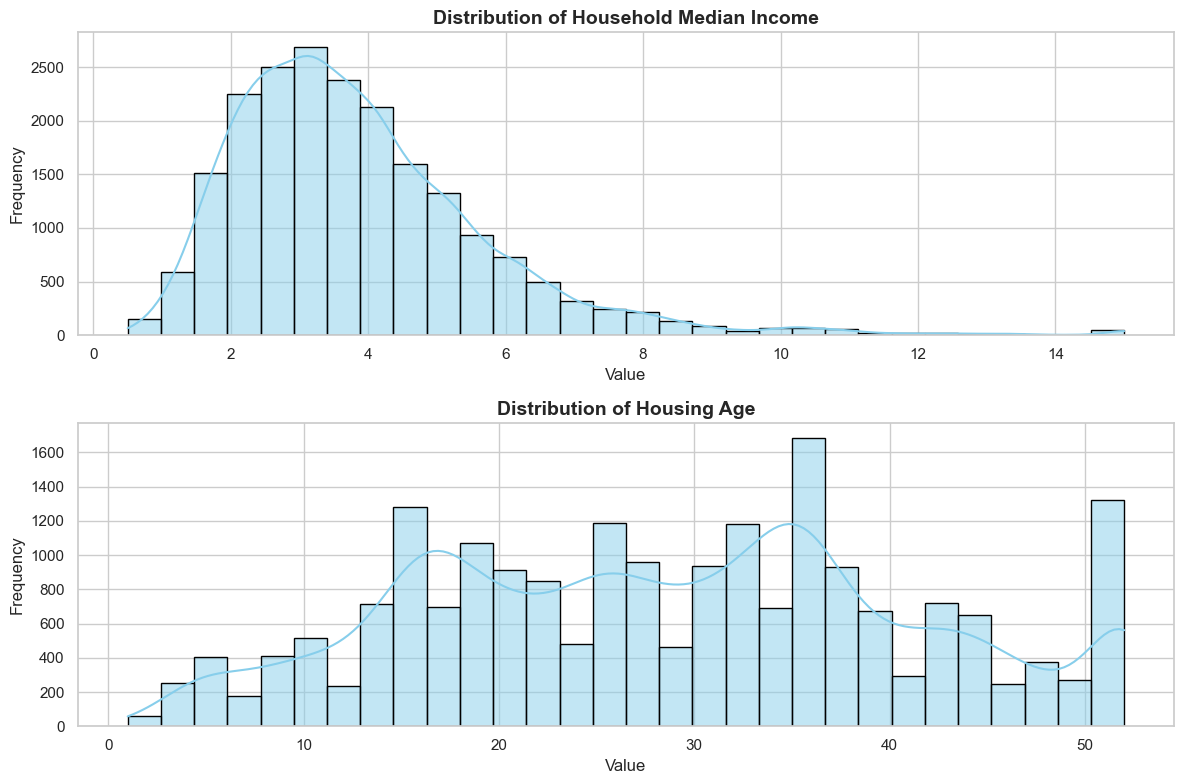

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

features = [
    ('median_income', 'Household Median Income'),
    ('housing_age', 'Housing Age'),
]

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

for i, (col, title) in enumerate(features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {title}', fontsize=14, weight='bold')
    axes[i].set_xlabel('Value', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)

plt.tight_layout()

plt.savefig('/Users/anhnguyendo/Documents/Python machine learning/Cali housing price project/California-house-pricing-prediction/figures/median_income_and_housing_age_histogram.png')
plt.show()



The distribution is right-skewed which means most households earn below the average income level in the dataset. This suggests that a significant portion of the California population in 1990 lived in low- to middle-income areas. Relevance to prediction: Since income directly influences affordability, this feature is likely to have a strong positive correlation with house prices. Higher-income areas are expected to have higher median home values, making this a highly predictive variable.

The distribution of housing age is more uniform, showing that homes of all ages are present across the dataset, with notable peaks at max age (~50 years) likely due to the data cap (built before 1940). There’s no dominant mode or clear central trend, which may reduce its power as a standalone predictor. While older homes may be cheaper due to depreciation, this relationship could be nonlinear or region-specific. Therefore, it may provide predictive value when combined with location or renovation indicators, but not strongly on its own.

In [23]:
#Create a correlation heat map

#compute the correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

                    median_income  housing_age  avg_rooms  avg_bedrooms  \
median_income            1.000000    -0.119034   0.326895     -0.062040   
housing_age             -0.119034     1.000000  -0.153277     -0.077747   
avg_rooms                0.326895    -0.153277   1.000000      0.847621   
avg_bedrooms            -0.062040    -0.077747   0.847621      1.000000   
population               0.004834    -0.296244  -0.072213     -0.066197   
avg_occupants            0.018766     0.013191  -0.004852     -0.006181   
latitude                -0.079809     0.011173   0.106389      0.069721   
longitude               -0.015176    -0.108197  -0.027540      0.013344   
median_house_value       0.688075     0.105623   0.151948     -0.046701   

                    population  avg_occupants  latitude  longitude  \
median_income         0.004834       0.018766 -0.079809  -0.015176   
housing_age          -0.296244       0.013191  0.011173  -0.108197   
avg_rooms            -0.072213      -0.

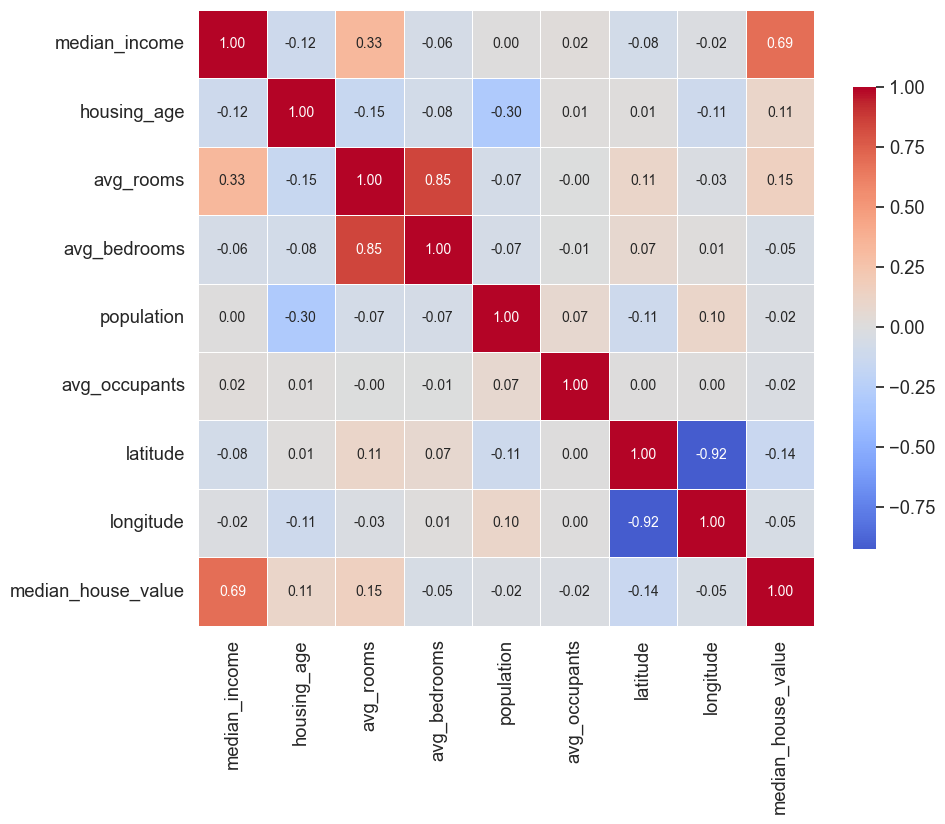

In [30]:
#create a heatmap
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.2)
sns.set_style('white')

sns.heatmap(corr_matrix,
            cmap = ('coolwarm'),
            annot = True,
            fmt = '.2f',
            center = 0,
            square = True,
            linewidths = 0.5,
            cbar_kws = {'shrink': 0.75},
            annot_kws = {'size':10})
plt.savefig('/Users/anhnguyendo/Documents/Python machine learning/Cali housing price project/California-house-pricing-prediction/figures/features_correlation.png')
plt.show()

Look at the correlation heat map, we can clearly see that the meadian_income has a strong, positive relationship with the median house value. It;s the top standalone predictor. 

Average rooms and bedrooms of the house have a weak correlation with the house value (0.15), howerver, both of them are highly collinear with each other (0.85). If we decide to use both of them as our features, it will be redundancy. 

Housing age and latitude/longitude are week correlation with the house value. However, with latitude and longitud together, we can capture the location-based price clusters by using the, as the geographic coordinate.

We'll likely drop population and average occupants because their correlation with the house value is near zero, likely won't add any value and increase noise.

<Figure size 1000x800 with 0 Axes>

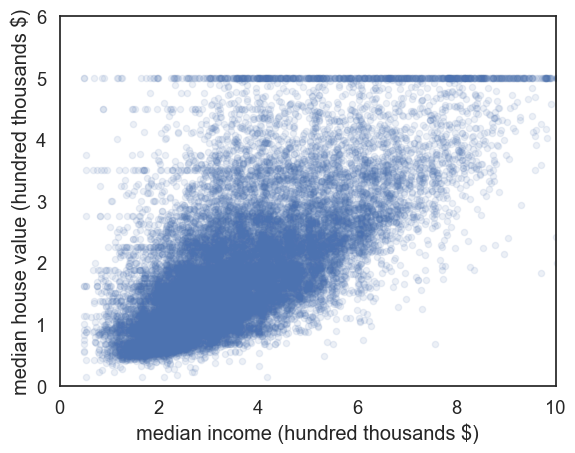

In [34]:
plt.figure(figsize = (10,8))
df.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.xlabel('median income (hundred thousands $)')
plt.ylabel('median house value (hundred thousands $)')
plt.axis([0,10,0,6])
plt.savefig('/Users/anhnguyendo/Documents/Python machine learning/Cali housing price project/California-house-pricing-prediction/figures/income_vs_house_value.png')
plt.show()

This scatter plot between median household's income and median house value proves our theory that the higher the income, the higher the value of the house

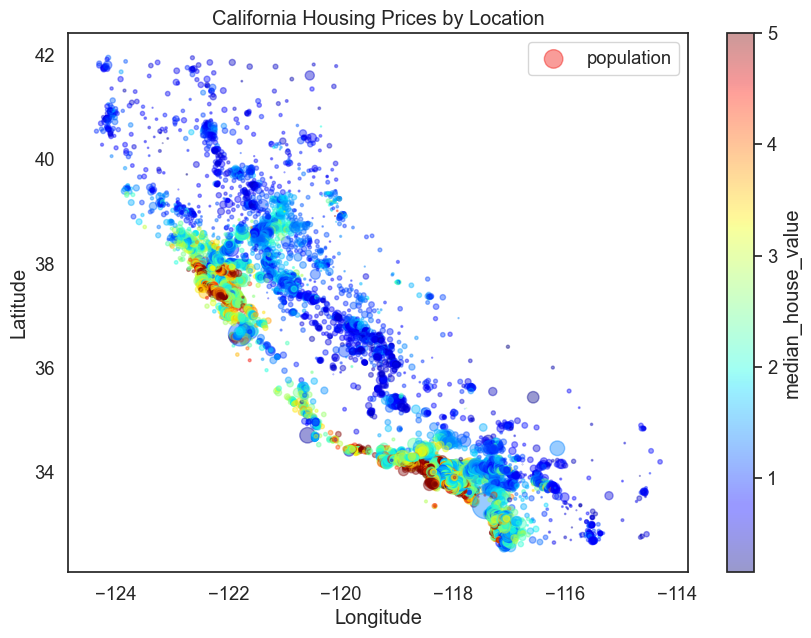

In [38]:
ax = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap="jet", colorbar=True)

plt.legend()
plt.title("California Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('/Users/anhnguyendo/Documents/Python machine learning/Cali housing price project/California-house-pricing-prediction/figures/latitude_and_longitude.png')
plt.show()


Red/yellow regions near San Francisco (top left) and Los Angeles (bottom right) show significantly higher median house values.
These areas are densely populated, with large dots, and are concentrated along the coast. This confirms that location is a strong non-linear predictor — latitude and longitude together can model geographic price patterns.

Interior areas (more to the right in longitude) and far northern parts show cooler colors (blue), indicating lower house values.
These places are also less populated, reinforcing that urban density relates to value.

Larger dot sizes coincide with high-price regions but also appear in some low-price areas. So, population is more contextual, helping visualize demand, but doesn't strongly correlate on its own.

In [40]:
#create new features 

#combine average rooms and bathrooms because they have high correlation with each other. Using both of them will be reduydancy
df['avg_rooms_bedrooms'] = df['avg_rooms'] + df['avg_bedrooms']

corr_mtx = df.corr()
corr_mtx ['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
avg_rooms             0.151948
avg_rooms_bedrooms    0.122561
housing_age           0.105623
avg_occupants        -0.023737
population           -0.024650
longitude            -0.045967
avg_bedrooms         -0.046701
latitude             -0.144160
Name: median_house_value, dtype: float64

In [42]:
#drop average_rooms, average_bedrooms, population
df.drop(['population','avg_rooms','avg_bedrooms'], axis = 1, inplace = True)

In [43]:
df.head()

,median_income,housing_age,avg_occupants,latitude,longitude,median_house_value,avg_rooms_bedrooms
0,8.3252,41.0,2.555556,37.88,-122.23,4.526,8.007937
1,8.3014,21.0,2.109842,37.86,-122.22,3.585,7.210018
2,7.2574,52.0,2.802260,37.85,-122.24,3.521,9.361582
3,5.6431,52.0,2.547945,37.85,-122.25,3.413,6.890411
4,3.8462,52.0,2.181467,37.85,-122.25,3.422,7.362934


In [44]:
df.to_csv('/Users/anhnguyendo/Documents/Python machine learning/Cali housing price project/California-house-pricing-prediction/data/processed/california_house_median_price_engineered.csv', index = False)